In [19]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding

#주어진 문장을 '단어'로 토큰화 하기
# keras.preprocessing(.text ,.sequence ,.image)
# keras.preprocessing.text 
# Tokenizer ,  hashing_trick , 
# one_hot , text_to_word_sequence ,tokenizer_from_json
# 케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러 옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence,Tokenizer

from keras.preprocessing import text

from keras.utils import to_categorical as tc

In [31]:
text = 'Life is too short to take this class....'
result = text_to_word_sequence(text)
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용
print("\n단어 카운트:\n", token.word_counts)
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index)

In [31]:
docs = ["시발 웃다 눈 빠젔다 너무 재밌네요","너무 최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]
classes = array([1,1,1,1,1,0,0,0,0,0])
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

x = token.texts_to_sequences(docs)
# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
# [2, 3, 4, 5, 1, 6] -> [ 4  5  1  6]  숫자 넘으면 앞에꺼 자르고 뒤에서 n 개 가져옴
# [1 7] -> [ 0  0  1  7]               앞 0 으로 채움
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)
#딥러닝 모델
print("\n딥러닝 모델 시작:")
#임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) +1

In [23]:
#단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 0s 992us/step - loss: 0.7035 - accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 998us/step - loss: 0.6988 - accuracy: 0.4000
Epoch 4/20
1/1 [==============================] - 0s 0s/step - loss: 0.6965 - accuracy: 0.4000
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4000
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.4000
Epoch 7/20
1/1 [==============================] - 0s 996us/step - loss: 0.6897 - accuracy: 0.4000
Epoch 8/20
1/1 [==============================] - 0s 998us/step - loss: 0.6874 - accuracy: 0.4000
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6000
Epoch 10/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6000
Epoch 11/20
1/1 [===============

### movie review classification (lstm , cnn)

In [35]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

c:\users\epsilon\dev\anaconda\envs\kera\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\epsilon\dev\anaconda\envs\kera\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                

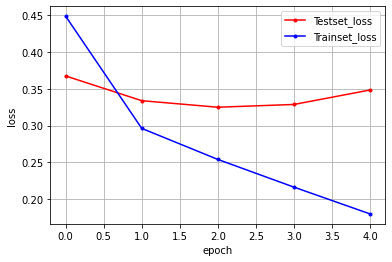

In [39]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()